In [8]:
import pandas as pd
from io import StringIO
pd.set_option('display.max_columns', None)

In [9]:
#Import dataframe
df_100pos = pd.read_csv('DataFiles/merged_per_minute.csv', low_memory=False)

df_anthro_players = pd.read_csv('DataFiles/player_anthro.csv', low_memory=False)


In [10]:
# common column is 'PLAYER_ID'
merged_df = pd.merge(df_100pos, df_anthro_players, on='PLAYER_NAME')
merged_df

,PLAYER_ID_x,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year,Season,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,JERSEY_NUMBER,POSITION_x,HEIGHT,WEIGHT_x,FROM_YEAR,TO_YEAR,TEMP_PLAYER_ID,PLAYER_ID_y,FIRST_NAME,LAST_NAME,POSITION_y,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,HEIGHT_W_SHOES,HEIGHT_W_SHOES_FT_IN,WEIGHT_y,WINGSPAN,WINGSPAN_FT_IN,STANDING_REACH,STANDING_REACH_FT_IN,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH,SeasonYear,HAND_WIDTH_FILLED,HAND_LENGTH_FILLED
0,244,Dee Brown,1610612738,BOS,28.0,21,4,17,0.190,521.878333,0.12,0.32,0.367,0.04,0.12,0.308,0.03,0.04,0.818,0.02,0.08,0.09,0.13,0.05,0.06,0.01,0.01,0.09,0.00,0.31,1996-97,Regular Season,Jacksonville,USA,1990,1,19,7,G,6-2,205.0,1990,2001,NaN,200793,Dee,Brown,PG-SG,71.00,5' 11'',72.00,6' 0'',179.0,74.00,6' 2'',94.0,7' 10'',NaN,NaN,NaN,2005-06,9.418394,8.723769
1,244,Dee Brown,1610612761,TOR,29.0,72,21,51,0.292,1722.648333,0.14,0.33,0.438,0.06,0.16,0.399,0.03,0.04,0.817,0.01,0.07,0.09,0.09,0.04,0.05,0.01,0.01,0.07,0.00,0.38,1997-98,Regular Season,Jacksonville,USA,1990,1,19,7,G,6-2,205.0,1990,2001,NaN,200793,Dee,Brown,PG-SG,71.00,5' 11'',72.00,6' 0'',179.0,74.00,6' 2'',94.0,7' 10'',NaN,NaN,NaN,2005-06,9.418394,8.723769
2,244,Dee Brown,1610612761,TOR,30.0,49,23,26,0.469,1379.883333,0.14,0.36,0.378,0.10,0.25,0.387,0.03,0.04,0.727,0.01,0.06,0.07,0.10,0.06,0.04,0.01,0.01,0.06,0.00,0.40,1998-99,Regular Season,Jacksonville,USA,1990,1,19,7,G,6-2,205.0,1990,2001,NaN,200793,Dee,Brown,PG-SG,71.00,5' 11'',72.00,6' 0'',179.0,74.00,6' 2'',94.0,7' 10'',NaN,NaN,NaN,2005-06,9.418394,8.723769
3,244,Dee Brown,1610612761,TOR,31.0,38,20,18,0.526,674.078333,0.14,0.38,0.360,0.10,0.28,0.358,0.02,0.02,0.688,0.01,0.07,0.08,0.13,0.06,0.04,0.01,0.02,0.09,0.00,0.39,1999-00,Regular Season,Jacksonville,USA,1990,1,19,7,G,6-2,205.0,1990,2001,NaN,200793,Dee,Brown,PG-SG,71.00,5' 11'',72.00,6' 0'',179.0,74.00,6' 2'',94.0,7' 10'',NaN,NaN,NaN,2005-06,9.418394,8.723769
4,244,Dee Brown,1610612761,TOR,31.0,3,0,3,0.000,19.411667,0.00,0.21,0.000,0.00,0.15,0.000,0.00,0.00,0.000,0.00,0.10,0.10,0.10,0.05,0.10,0.00,0.00,0.21,0.00,0.00,1999-00,Playoffs,Jacksonville,USA,1990,1,19,7,G,6-2,205.0,1990,2001,NaN,200793,Dee,Brown,PG-SG,71.00,5' 11'',72.00,6' 0'',179.0,74.00,6' 2'',94.0,7' 10'',NaN,NaN,NaN,2005-06,9.418394,8.723769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7789,1631106,Tari Eason,1610612745,HOU,22.0,82,22,60,0.268,1767.220000,0.17,0.37,0.448,0.03,0.10,0.343,0.06,0.08,0.752,0.11,0.17,0.28,0.05,0.06,0.05,0.03,0.04,0.11,0.06,0.43,2022-23,Regular Season,Louisiana State,USA,2022,1,17,17,F,6-8,215.0,2022,2023,1631106.0,1631106,Tari,Eason,PF,78.75,6' 6.75'',80.00,6' 8.00'',217.4,86.00,7' 2.00'',107.5,8' 11.50'',5.9,9.25,11.00,2022-23,11.000000,9.250000
7790,1631211,Trevor Keels,1610612752,NYK,19.0,3,3,0,1.000,8.040000,0.12,0.50,0.250,0.12,0.50,0.250,0.00,0.00,0.000,0.00,0.25,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.37,2022-23,Regular Season,Duke,USA,2022,2,42,3,G,6-4,221.0,2022,2022,1631211.0,1631211,Trevor,Keels,SG,75.25,6' 3.25'',76.75,6' 4.75'',223.8,79.25,6' 7.25'',101.0,8' 5.00'',13.5,8.25,9.00,2022-23,9.000000,8.250000
7791,1631102,TyTy Washington Jr.,1610612745,HOU,21.0,31,6,25,0.194,432.713333,0.13,0.37,0.363,0.04,0.18,0.238,0.02,0.04,0.556,0.00,0.10,0.10,0.11,0.03,0.03,0.00,0.01,0.07,0.04,0.34,2022-23,Regular Season,Kentucky,USA,2022,1,29,23,G,6-3,195.0,2022,2023,1631102.0,1631102,TyTy,Washington Jr.,SG,74.25,6' 2.25'',75.75,6' 3.75'',196.4,80.00,6' 8.00'',99.5,8' 3.50'',12.0,8.50,9.25,2022-23,9.250000,8.500000
7792,1631213,Tyrese Martin,1610612737,ATL,24.0,16,10,6,0.625,65.540000,0.14,0.35,0.391,0.02,0.11,0.143,0.03,0.03,1.000,0.08,0.11,0.18,0.03,0.03,0.02,0.00,0.03,0.03,0.02,0.32,2022-23,

In [11]:
# Check the number of null values in 'WINGSPAN_FT_IN' column
null_count_STANDING_REACH_FT_IN	= merged_df['STANDING_REACH_FT_IN'].isnull().sum()

# Check the number of null values in 'STANDING_REACH_FT_IN' column
null_count_WINGSPAN_FT_IN = merged_df['WINGSPAN_FT_IN'].isnull().sum()

# Print the results
print("Number of null values in 'STANDING_REACH_FT_IN' column:", null_count_wingspan)
print("Number of null values in 'WINGSPAN_FT_IN' column:", null_count_standing_reach)


NameError: name 'null_count_wingspan' is not defined

In [ ]:
# # Assuming merged_df is your DataFrame
# # Calculate the average of the 'HAND_WIDTH' and 'HAND_LENGTH' columns
# average_standing_reach= merged_df['STANDING_REACH_FT_IN'].mean()
# average_wingspan= merged_df['WINGSPAN_FT_IN'].mean()

# # Fill null values with the average values
# merged_df['STANDING_REACH_FILLED'] = merged_df['STANDING_REACH_FT_IN'].fillna(float(average_standing_reach))
# merged_df['WINGSPAN_FT_IN'] = merged_df['WINGSPAN_FT_IN'].fillna(float(average_wingspan))

# # Print out the new DataFrame with filled values
# merged_df.tail()


In [12]:
# Adding additional advanced metric columns

# Shooting efficiency
merged_df['FG3A%'] = merged_df['FG3A'] / merged_df['FGA']
merged_df['PTS/FGA'] = merged_df['PTS'] / merged_df['FGA']
merged_df['FG3M/FGM'] = merged_df['FG3M'] / merged_df['FGM']
merged_df['FTA/FGA'] = merged_df['FTA'] / merged_df['FGA']


# True Shooting Percentage
merged_df['TRU%'] = 0.5 * merged_df['PTS'] / (merged_df['FGA'] + 0.475 * merged_df['FTA'])

# Assists to Turnover Ratio
merged_df['AST_TOV'] = merged_df['AST'] / merged_df['TOV']

merged_df['POSSESSION'] = merged_df.apply(lambda row: row['FGA'] + 0.44 * row['FTA'] - row['OREB'] + row['TOV'], axis=1)

merged_df[(merged_df['PLAYER_NAME'] == 1629029)]
merged_df

,PLAYER_ID_x,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year,Season,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,JERSEY_NUMBER,POSITION_x,HEIGHT,WEIGHT_x,FROM_YEAR,TO_YEAR,TEMP_PLAYER_ID,PLAYER_ID_y,FIRST_NAME,LAST_NAME,POSITION_y,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,HEIGHT_W_SHOES,HEIGHT_W_SHOES_FT_IN,WEIGHT_y,WINGSPAN,WINGSPAN_FT_IN,STANDING_REACH,STANDING_REACH_FT_IN,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH,SeasonYear,HAND_WIDTH_FILLED,HAND_LENGTH_FILLED,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV,POSSESSION
0,244,Dee Brown,1610612738,BOS,28.0,21,4,17,0.190,521.878333,0.12,0.32,0.367,0.04,0.12,0.308,0.03,0.04,0.818,0.02,0.08,0.09,0.13,0.05,0.06,0.01,0.01,0.09,0.00,0.31,1996-97,Regular Season,Jacksonville,USA,1990,1,19,7,G,6-2,205.0,1990,2001,NaN,200793,Dee,Brown,PG-SG,71.00,5' 11'',72.00,6' 0'',179.0,74.00,6' 2'',94.0,7' 10'',NaN,NaN,NaN,2005-06,9.418394,8.723769,0.375000,0.968750,0.333333,0.125000,0.457227,2.600000,0.3676
1,244,Dee Brown,1610612761,TOR,29.0,72,21,51,0.292,1722.648333,0.14,0.33,0.438,0.06,0.16,0.399,0.03,0.04,0.817,0.01,0.07,0.09,0.09,0.04,0.05,0.01,0.01,0.07,0.00,0.38,1997-98,Regular Season,Jacksonville,USA,1990,1,19,7,G,6-2,205.0,1990,2001,NaN,200793,Dee,Brown,PG-SG,71.00,5' 11'',72.00,6' 0'',179.0,74.00,6' 2'',94.0,7' 10'',NaN,NaN,NaN,2005-06,9.418394,8.723769,0.484848,1.151515,0.428571,0.121212,0.544413,2.250000,0.3776
2,244,Dee Brown,1610612761,TOR,30.0,49,23,26,0.469,1379.883333,0.14,0.36,0.378,0.10,0.25,0.387,0.03,0.04,0.727,0.01,0.06,0.07,0.10,0.06,0.04,0.01,0.01,0.06,0.00,0.40,1998-99,Regular Season,Jacksonville,USA,1990,1,19,7,G,6-2,205.0,1990,2001,NaN,200793,Dee,Brown,PG-SG,71.00,5' 11'',72.00,6' 0'',179.0,74.00,6' 2'',94.0,7' 10'',NaN,NaN,NaN,2005-06,9.418394,8.723769,0.694444,1.111111,0.714286,0.111111,0.527704,1.666667,0.4276
3,244,Dee Brown,1610612761,TOR,31.0,38,20,18,0.526,674.078333,0.14,0.38,0.360,0.10,0.28,0.358,0.02,0.02,0.688,0.01,0.07,0.08,0.13,0.06,0.04,0.01,0.02,0.09,0.00,0.39,1999-00,Regular Season,Jacksonville,USA,1990,1,19,7,G,6-2,205.0,1990,2001,NaN,200793,Dee,Brown,PG-SG,71.00,5' 11'',72.00,6' 0'',179.0,74.00,6' 2'',94.0,7' 10'',NaN,NaN,NaN,2005-06,9.418394,8.723769,0.736842,1.026316,0.714286,0.052632,0.500642,2.166667,0.4388
4,244,Dee Brown,1610612761,TOR,31.0,3,0,3,0.000,19.411667,0.00,0.21,0.000,0.00,0.15,0.000,0.00,0.00,0.000,0.00,0.10,0.10,0.10,0.05,0.10,0.00,0.00,0.21,0.00,0.00,1999-00,Playoffs,Jacksonville,USA,1990,1,19,7,G,6-2,205.0,1990,2001,NaN,200793,Dee,Brown,PG-SG,71.00,5' 11'',72.00,6' 0'',179.0,74.00,6' 2'',94.0,7' 10'',NaN,NaN,NaN,2005-06,9.418394,8.723769,0.714286,0.000000,NaN,0.000000,0.000000,2.000000,0.2600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7789,1631106,Tari Eason,1610612745,HOU,22.0,82,22,60,0.268,1767.220000,0.17,0.37,0.448,0.03,0.10,0.343,0.06,0.08,0.752,0.11,0.17,0.28,0.05,0.06,0.05,0.03,0.04,0.11,0.06,0.43,2022-23,Regular Season,Louisiana State,USA,2022,1,17,17,F,6-8,215.0,2022,2023,1631106.0,1631106,Tari,Eason,PF,78.75,6' 6.75'',80.00,6' 8.00'',217.4,86.00,7' 2.00'',107.5,8' 11.50'',5.9,9.25,11.00,2022-23,11.000000,9.250000,0.270270,1.162162,0.176471,0.216216,0.526961,0.833333,0.3552
7790,1631211,Trevor Keels,1610612752,NYK,19.0,3,3,0,1.000,8.040000,0.12,0.50,0.250,0.12,0.50,0.250,0.00,0.00,0.000,0.00,0.25,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.37,2022-23,Regular Season,Duke,USA,2022,2,42,3,G,6-4,221.0,2022,2022,1631211.0,1631211,Trevor,Keels,SG,75.25,6' 3.25'',76.75,6' 4.75'',223.8,79.25,6' 7.25'',101.0,8' 5.00'',13.5,8.25,9.00,2022-23,9.000000,8.250000,1.000000,0.740000,1.000000,0.000000,0.370000,NaN,0.5000
7791,1631102,TyTy Washington Jr.,1610612745,HOU,21.0,31,6,25,0.194,432.713333,0.13,0.

In [ ]:
# Replacing intermediary positions with one. All in all there are 3 positions - C, F and G. 
merged_df['POSITION_x'] = merged_df['POSITION_x'].str.replace('F-C', 'F').replace('C-F', 'C').replace('F-G', 'F').replace('G-F', 'G')

In [15]:
# Number of positions per unique European player:
merged_df.groupby('POSITION_x')['PLAYER_ID_x'].nunique()


POSITION_x
C       93
C-F     36
F      316
F-C     53
F-G     35
G      406
G-F     74
Name: PLAYER_ID_x, dtype: int64

In [16]:
# European countries in basketball sense
europe = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
  'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
  'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
  'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 
  'United Kingdom', 'Norway', 'Switzerland', 'Belarus', 'Russia', 'Ukraine',
  'Moldova', 'Georgia', 'Armenia', 'Azerbaijan', 'Turkey', 'Israel', 'Albania',
  'Macedonia', 'Serbia', 'Montenegro', 'Bosnia and Herzegovina', 'Iceland']

In [17]:
merged_df

,PLAYER_ID_x,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year,Season,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,JERSEY_NUMBER,POSITION_x,HEIGHT,WEIGHT_x,FROM_YEAR,TO_YEAR,TEMP_PLAYER_ID,PLAYER_ID_y,FIRST_NAME,LAST_NAME,POSITION_y,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,HEIGHT_W_SHOES,HEIGHT_W_SHOES_FT_IN,WEIGHT_y,WINGSPAN,WINGSPAN_FT_IN,STANDING_REACH,STANDING_REACH_FT_IN,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH,SeasonYear,HAND_WIDTH_FILLED,HAND_LENGTH_FILLED,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV,POSSESSION
0,244,Dee Brown,1610612738,BOS,28.0,21,4,17,0.190,521.878333,0.12,0.32,0.367,0.04,0.12,0.308,0.03,0.04,0.818,0.02,0.08,0.09,0.13,0.05,0.06,0.01,0.01,0.09,0.00,0.31,1996-97,Regular Season,Jacksonville,USA,1990,1,19,7,G,6-2,205.0,1990,2001,NaN,200793,Dee,Brown,PG-SG,71.00,5' 11'',72.00,6' 0'',179.0,74.00,6' 2'',94.0,7' 10'',NaN,NaN,NaN,2005-06,9.418394,8.723769,0.375000,0.968750,0.333333,0.125000,0.457227,2.600000,0.3676
1,244,Dee Brown,1610612761,TOR,29.0,72,21,51,0.292,1722.648333,0.14,0.33,0.438,0.06,0.16,0.399,0.03,0.04,0.817,0.01,0.07,0.09,0.09,0.04,0.05,0.01,0.01,0.07,0.00,0.38,1997-98,Regular Season,Jacksonville,USA,1990,1,19,7,G,6-2,205.0,1990,2001,NaN,200793,Dee,Brown,PG-SG,71.00,5' 11'',72.00,6' 0'',179.0,74.00,6' 2'',94.0,7' 10'',NaN,NaN,NaN,2005-06,9.418394,8.723769,0.484848,1.151515,0.428571,0.121212,0.544413,2.250000,0.3776
2,244,Dee Brown,1610612761,TOR,30.0,49,23,26,0.469,1379.883333,0.14,0.36,0.378,0.10,0.25,0.387,0.03,0.04,0.727,0.01,0.06,0.07,0.10,0.06,0.04,0.01,0.01,0.06,0.00,0.40,1998-99,Regular Season,Jacksonville,USA,1990,1,19,7,G,6-2,205.0,1990,2001,NaN,200793,Dee,Brown,PG-SG,71.00,5' 11'',72.00,6' 0'',179.0,74.00,6' 2'',94.0,7' 10'',NaN,NaN,NaN,2005-06,9.418394,8.723769,0.694444,1.111111,0.714286,0.111111,0.527704,1.666667,0.4276
3,244,Dee Brown,1610612761,TOR,31.0,38,20,18,0.526,674.078333,0.14,0.38,0.360,0.10,0.28,0.358,0.02,0.02,0.688,0.01,0.07,0.08,0.13,0.06,0.04,0.01,0.02,0.09,0.00,0.39,1999-00,Regular Season,Jacksonville,USA,1990,1,19,7,G,6-2,205.0,1990,2001,NaN,200793,Dee,Brown,PG-SG,71.00,5' 11'',72.00,6' 0'',179.0,74.00,6' 2'',94.0,7' 10'',NaN,NaN,NaN,2005-06,9.418394,8.723769,0.736842,1.026316,0.714286,0.052632,0.500642,2.166667,0.4388
4,244,Dee Brown,1610612761,TOR,31.0,3,0,3,0.000,19.411667,0.00,0.21,0.000,0.00,0.15,0.000,0.00,0.00,0.000,0.00,0.10,0.10,0.10,0.05,0.10,0.00,0.00,0.21,0.00,0.00,1999-00,Playoffs,Jacksonville,USA,1990,1,19,7,G,6-2,205.0,1990,2001,NaN,200793,Dee,Brown,PG-SG,71.00,5' 11'',72.00,6' 0'',179.0,74.00,6' 2'',94.0,7' 10'',NaN,NaN,NaN,2005-06,9.418394,8.723769,0.714286,0.000000,NaN,0.000000,0.000000,2.000000,0.2600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7789,1631106,Tari Eason,1610612745,HOU,22.0,82,22,60,0.268,1767.220000,0.17,0.37,0.448,0.03,0.10,0.343,0.06,0.08,0.752,0.11,0.17,0.28,0.05,0.06,0.05,0.03,0.04,0.11,0.06,0.43,2022-23,Regular Season,Louisiana State,USA,2022,1,17,17,F,6-8,215.0,2022,2023,1631106.0,1631106,Tari,Eason,PF,78.75,6' 6.75'',80.00,6' 8.00'',217.4,86.00,7' 2.00'',107.5,8' 11.50'',5.9,9.25,11.00,2022-23,11.000000,9.250000,0.270270,1.162162,0.176471,0.216216,0.526961,0.833333,0.3552
7790,1631211,Trevor Keels,1610612752,NYK,19.0,3,3,0,1.000,8.040000,0.12,0.50,0.250,0.12,0.50,0.250,0.00,0.00,0.000,0.00,0.25,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.37,2022-23,Regular Season,Duke,USA,2022,2,42,3,G,6-4,221.0,2022,2022,1631211.0,1631211,Trevor,Keels,SG,75.25,6' 3.25'',76.75,6' 4.75'',223.8,79.25,6' 7.25'',101.0,8' 5.00'',13.5,8.25,9.00,2022-23,9.000000,8.250000,1.000000,0.740000,1.000000,0.000000,0.370000,NaN,0.5000
7791,1631102,TyTy Washington Jr.,1610612745,HOU,21.0,31,6,25,0.194,432.713333,0.13,0.

In [18]:
# Define function for European countries
def filter_europe(df, column_name, europe):
    return df[df[column_name].isin(europe)]

In [19]:
# New object for European players playing at F in regular season games:
europe_F_regular = filter_europe(merged_df, 'COUNTRY', europe)
europe_F_regular = europe_F_regular.loc[europe_F_regular['POSITION_x'].isin(['F']) & europe_F_regular['Season'].isin(['Regular Season'])]

In [20]:
europe_F_regular

,PLAYER_ID_x,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year,Season,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,JERSEY_NUMBER,POSITION_x,HEIGHT,WEIGHT_x,FROM_YEAR,TO_YEAR,TEMP_PLAYER_ID,PLAYER_ID_y,FIRST_NAME,LAST_NAME,POSITION_y,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,HEIGHT_W_SHOES,HEIGHT_W_SHOES_FT_IN,WEIGHT_y,WINGSPAN,WINGSPAN_FT_IN,STANDING_REACH,STANDING_REACH_FT_IN,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH,SeasonYear,HAND_WIDTH_FILLED,HAND_LENGTH_FILLED,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV,POSSESSION
243,2238,Antonis Fotsis,1610612763,MEM,21.0,28,6,22,0.214,317.350000,0.13,0.33,0.404,0.02,0.07,0.304,0.05,0.06,0.850,0.08,0.12,0.20,0.03,0.07,0.03,0.03,0.03,0.07,0.00,0.34,2001-02,Regular Season,NaN,Greece,2001,2,47,6,F,6-10,219.0,2001,2001,NaN,2238,Antonis,Fotsis,SF,81.25,6' 9.25'',NaN,NaN,219.0,80.50,6' 8.5'',106.0,8' 10'',NaN,NaN,NaN,2000-01,9.418394,8.723769,0.212121,1.030303,0.153846,0.181818,0.474198,0.428571,0.3464
1105,2443,Darius Songaila,1610612758,SAC,26.0,73,49,24,0.671,973.665000,0.14,0.28,0.487,0.00,0.00,0.000,0.07,0.09,0.807,0.09,0.14,0.23,0.05,0.04,0.04,0.01,0.04,0.13,0.00,0.35,2003-04,Regular Season,Wake Forest,Lithuania,2002,2,49,25,F,6-9,248.0,2003,2010,NaN,2443,Darius,Songaila,PF,80.00,6' 8'',NaN,NaN,240.0,85.00,7' 1'',108.5,9' 0.5'',NaN,NaN,NaN,2002-03,9.418394,8.723769,0.000000,1.250000,0.000000,0.321429,0.542215,1.250000,0.2696
1107,2443,Darius Songaila,1610612758,SAC,27.0,81,50,31,0.617,1658.480000,0.15,0.29,0.527,0.00,0.00,0.000,0.06,0.07,0.847,0.08,0.13,0.21,0.07,0.04,0.03,0.01,0.02,0.12,0.00,0.37,2004-05,Regular Season,Wake Forest,Lithuania,2002,2,49,25,F,6-9,248.0,2003,2010,NaN,2443,Darius,Songaila,PF,80.00,6' 8'',NaN,NaN,240.0,85.00,7' 1'',108.5,9' 0.5'',NaN,NaN,NaN,2002-03,9.418394,8.723769,0.000000,1.275862,0.000000,0.241379,0.572312,1.750000,0.2808
1109,2443,Darius Songaila,1610612741,CHI,28.0,62,27,35,0.435,1328.745000,0.18,0.37,0.481,0.00,0.00,0.400,0.07,0.09,0.817,0.06,0.13,0.19,0.07,0.06,0.03,0.01,0.02,0.12,0.09,0.43,2005-06,Regular Season,Wake Forest,Lithuania,2002,2,49,25,F,6-9,248.0,2003,2010,NaN,2443,Darius,Songaila,PF,80.00,6' 8'',NaN,NaN,240.0,85.00,7' 1'',108.5,9' 0.5'',NaN,NaN,NaN,2002-03,9.418394,8.723769,0.000000,1.162162,0.000000,0.243243,0.520896,1.166667,0.4096
1110,2443,Darius Songaila,1610612764,WAS,29.0,37,14,23,0.378,699.560000,0.17,0.32,0.524,0.00,0.00,0.000,0.07,0.08,0.852,0.06,0.13,0.19,0.05,0.06,0.02,0.01,0.02,0.15,0.07,0.40,2006-07,Regular Season,Wake Forest,Lithuania,2002,2,49,25,F,6-9,248.0,2003,2010,NaN,2443,Darius,Songaila,PF,80.00,6' 8'',NaN,NaN,240.0,85.00,7' 1'',108.5,9' 0.5'',NaN,NaN,NaN,2002-03,9.418394,8.723769,0.000000,1.250000,0.000000,0.250000,0.558659,0.833333,0.3552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7717,1630582,Yves Pons,1610612763,MEM,23.0,12,9,3,0.750,70.975000,0.07,0.23,0.313,0.04,0.13,0.333,0.00,0.03,0.000,0.07,0.10,0.17,0.01,0.01,0.01,0.06,0.01,0.08,0.04,0.18,2021-22,Regular Season,Tennessee,France,Undrafted,Undrafted,Undrafted,5,F,6-5,206.0,2021,2021,1630582.0,1630582,Yves,Pons,PF,77.50,6'5.5'',78.75,6'6.75'',206.4,84.75,7'0.75'',104.0,8'8.0'',4.0,9.00,9.25,2021-22,9.250000,9.000000,0.565217,0.782609,0.571429,0.130435,0.368475,1.000000,0.1832
7750,1631110,Jeremy Sochan,1610612759,SAS,20.0,56,15,41,0.268,1457.700000,0.17,0.38,0.453,0.02,0.09,0.246,0.06,0.08,0.698,0.07,0.14,0.20,0.10,0.07,0.03,0.02,0.03,0.09,0.07,0.42,2022-23,Regular Season,Baylor,Poland,2022,1,9,10,F,6-8,230.0,2022,2023,1631110.0,1631110,Jeremy,Sochan,PF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-23,9.418394,8.723769,0.236842,1.105263,0.117647,0.210526,0.502392,1.428571,0.4152
7771,1631217,Moussa Diabate,16106

In [27]:
# Number of positions per unique European player:
europe_F_regular.groupby('POSITION_x')['PLAYER_ID_x'].nunique()


POSITION_x
F    16
Name: PLAYER_ID_x, dtype: int64

In [28]:
# Define function for non-european countries
def filter_non_europe(df, column_name='COUNTRY', country_list=europe):
    return df[~df[column_name].isin(europe)]

In [29]:
# New object for Non-europe players playing at F in regular season games:
non_europe_F_regular = filter_non_europe(merged_df)
non_europe_F_regular = non_europe_F_regular.loc[non_europe_F_regular['POSITION_x'].isin(['F']) & non_europe_F_regular['Season'].isin(['Regular Season'])]

In [37]:
# Number of positions per unique European player:
europe_F_regular.groupby('COUNTRY')['PLAYER_ID_x'].nunique()

COUNTRY
Croatia           1
Finland           1
France            3
Greece            3
Israel            1
Lithuania         1
Poland            1
Serbia            1
Turkey            1
Ukraine           1
United Kingdom    2
Name: PLAYER_ID_x, dtype: int64

In [31]:
# Number of positions per unique US player:
non_europe_F_regular.groupby('POSITION_x')['PLAYER_ID_x'].nunique()

POSITION_x
F    300
Name: PLAYER_ID_x, dtype: int64

In [32]:
europe_F_regular.head()

,PLAYER_ID_x,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year,Season,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,JERSEY_NUMBER,POSITION_x,HEIGHT,WEIGHT_x,FROM_YEAR,TO_YEAR,TEMP_PLAYER_ID,PLAYER_ID_y,FIRST_NAME,LAST_NAME,POSITION_y,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,HEIGHT_W_SHOES,HEIGHT_W_SHOES_FT_IN,WEIGHT_y,WINGSPAN,WINGSPAN_FT_IN,STANDING_REACH,STANDING_REACH_FT_IN,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH,SeasonYear,HAND_WIDTH_FILLED,HAND_LENGTH_FILLED,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV,POSSESSION,Europe
243,2238,Antonis Fotsis,1610612763,MEM,21.0,28,6,22,0.214,317.350,0.13,0.33,0.404,0.02,0.07,0.304,0.05,0.06,0.850,0.08,0.12,0.20,0.03,0.07,0.03,0.03,0.03,0.07,0.00,0.34,2001-02,Regular Season,NaN,Greece,2001,2,47,6,F,6-10,219.0,2001,2001,NaN,2238,Antonis,Fotsis,SF,81.25,6' 9.25'',NaN,NaN,219.0,80.5,6' 8.5'',106.0,8' 10'',NaN,NaN,NaN,2000-01,9.418394,8.723769,0.212121,1.030303,0.153846,0.181818,0.474198,0.428571,0.3464,European
1105,2443,Darius Songaila,1610612758,SAC,26.0,73,49,24,0.671,973.665,0.14,0.28,0.487,0.00,0.00,0.000,0.07,0.09,0.807,0.09,0.14,0.23,0.05,0.04,0.04,0.01,0.04,0.13,0.00,0.35,2003-04,Regular Season,Wake Forest,Lithuania,2002,2,49,25,F,6-9,248.0,2003,2010,NaN,2443,Darius,Songaila,PF,80.00,6' 8'',NaN,NaN,240.0,85.0,7' 1'',108.5,9' 0.5'',NaN,NaN,NaN,2002-03,9.418394,8.723769,0.000000,1.250000,0.000000,0.321429,0.542215,1.250000,0.2696,European
1107,2443,Darius Songaila,1610612758,SAC,27.0,81,50,31,0.617,1658.480,0.15,0.29,0.527,0.00,0.00,0.000,0.06,0.07,0.847,0.08,0.13,0.21,0.07,0.04,0.03,0.01,0.02,0.12,0.00,0.37,2004-05,Regular Season,Wake Forest,Lithuania,2002,2,49,25,F,6-9,248.0,2003,2010,NaN,2443,Darius,Songaila,PF,80.00,6' 8'',NaN,NaN,240.0,85.0,7' 1'',108.5,9' 0.5'',NaN,NaN,NaN,2002-03,9.418394,8.723769,0.000000,1.275862,0.000000,0.241379,0.572312,1.750000,0.2808,European
1109,2443,Darius Songaila,1610612741,CHI,28.0,62,27,35,0.435,1328.745,0.18,0.37,0.481,0.00,0.00,0.400,0.07,0.09,0.817,0.06,0.13,0.19,0.07,0.06,0.03,0.01,0.02,0.12,0.09,0.43,2005-06,Regular Season,Wake Forest,Lithuania,2002,2,49,25,F,6-9,248.0,2003,2010,NaN,2443,Darius,Songaila,PF,80.00,6' 8'',NaN,NaN,240.0,85.0,7' 1'',108.5,9' 0.5'',NaN,NaN,NaN,2002-03,9.418394,8.723769,0.000000,1.162162,0.000000,0.243243,0.520896,1.166667,0.4096,European
1110,2443,Darius Songaila,1610612764,WAS,29.0,37,14,23,0.378,699.560,0.17,0.32,0.524,0.00,0.00,0.000,0.07,0.08,0.852,0.06,0.13,0.19,0.05,0.06,0.02,0.01,0.02,0.15,0.07,0.40,2006-07,Regular Season,Wake Forest,Lithuania,2002,2,49,25,F,6-9,248.0,2003,2010,NaN,2443,Darius,Songaila,PF,80.00,6' 8'',NaN,NaN,240.0,85.0,7' 1'',108.5,9' 0.5'',NaN,NaN,NaN,2002-03,9.418394,8.723769,0.000000,1.250000,0.000000,0.250000,0.558659,0.833333,0.3552,European


In [33]:
non_europe_F_regular['HAND_WIDTH_FILLED'].describe()

count    1632.000000
mean        9.492549
std         0.489415
min         7.750000
25%         9.418394
50%         9.418394
75%         9.500000
max        11.750000
Name: HAND_WIDTH_FILLED, dtype: float64

In [34]:
non_europe_F_regular

,PLAYER_ID_x,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year,Season,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,JERSEY_NUMBER,POSITION_x,HEIGHT,WEIGHT_x,FROM_YEAR,TO_YEAR,TEMP_PLAYER_ID,PLAYER_ID_y,FIRST_NAME,LAST_NAME,POSITION_y,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,HEIGHT_W_SHOES,HEIGHT_W_SHOES_FT_IN,WEIGHT_y,WINGSPAN,WINGSPAN_FT_IN,STANDING_REACH,STANDING_REACH_FT_IN,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH,SeasonYear,HAND_WIDTH_FILLED,HAND_LENGTH_FILLED,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV,POSSESSION
11,677,Eric Williams,1610612738,BOS,24.0,72,13,59,0.181,2433.400000,0.15,0.34,0.456,0.00,0.00,0.250,0.13,0.18,0.752,0.05,0.08,0.13,0.05,0.06,0.03,0.01,0.04,0.09,0.00,0.44,1996-97,Regular Season,Providence,USA,1995,1,14,NaN,F,6-8,220.0,1995,2006,NaN,12203,Eric,Williams,C-PF,79.25,6' 7.25'',80.75,6' 8.75'',285.0,88.25,7' 4.25'',106.5,8' 10.5'',13.0,NaN,NaN,2006-07,9.418394,8.723769,0.000000,1.294118,0.000000,0.529412,0.517039,0.833333,0.4292
12,677,Eric Williams,1610612743,DEN,25.0,4,0,4,0.000,144.705000,0.17,0.42,0.393,0.00,0.00,0.000,0.21,0.31,0.689,0.07,0.08,0.15,0.08,0.06,0.03,0.00,0.03,0.06,0.00,0.55,1997-98,Regular Season,Providence,USA,1995,1,14,NaN,F,6-8,220.0,1995,2006,NaN,12203,Eric,Williams,C-PF,79.25,6' 7.25'',80.75,6' 8.75'',285.0,88.25,7' 4.25'',106.5,8' 10.5'',13.0,NaN,NaN,2006-07,9.418394,8.723769,0.000000,1.309524,0.000000,0.738095,0.484795,1.333333,0.5464
13,677,Eric Williams,1610612743,DEN,26.0,38,11,27,0.289,775.526667,0.10,0.28,0.365,0.01,0.03,0.231,0.14,0.18,0.799,0.04,0.06,0.10,0.05,0.06,0.03,0.01,0.03,0.10,0.00,0.36,1998-99,Regular Season,Providence,USA,1995,1,14,NaN,F,6-8,220.0,1995,2006,NaN,12203,Eric,Williams,C-PF,79.25,6' 7.25'',80.75,6' 8.75'',285.0,88.25,7' 4.25'',106.5,8' 10.5'',13.0,NaN,NaN,2006-07,9.418394,8.723769,0.107143,1.285714,0.100000,0.642857,0.492476,0.833333,0.3792
14,677,Eric Williams,1610612738,BOS,27.0,68,30,38,0.441,1382.420000,0.12,0.28,0.427,0.02,0.05,0.347,0.10,0.12,0.793,0.04,0.07,0.11,0.07,0.05,0.03,0.01,0.02,0.12,0.02,0.35,1999-00,Regular Season,Providence,USA,1995,1,14,NaN,F,6-8,220.0,1995,2006,NaN,12203,Eric,Williams,C-PF,79.25,6' 7.25'',80.75,6' 8.75'',285.0,88.25,7' 4.25'',106.5,8' 10.5'',13.0,NaN,NaN,2006-07,9.418394,8.723769,0.178571,1.250000,0.166667,0.428571,0.519288,1.400000,0.3428
15,677,Eric Williams,1610612738,BOS,28.0,81,36,45,0.444,1742.538333,0.09,0.26,0.362,0.03,0.08,0.331,0.09,0.13,0.714,0.04,0.08,0.12,0.06,0.04,0.04,0.01,0.02,0.10,0.00,0.31,2000-01,Regular Season,Providence,USA,1995,1,14,NaN,F,6-8,220.0,1995,2006,NaN,12203,Eric,Williams,C-PF,79.25,6' 7.25'',80.75,6' 8.75'',285.0,88.25,7' 4.25'',106.5,8' 10.5'',13.0,NaN,NaN,2006-07,9.418394,8.723769,0.307692,1.192308,0.333333,0.500000,0.481740,1.500000,0.3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7779,1631094,Paolo Banchero,1610612753,ORL,20.0,72,31,41,0.431,2429.723333,0.20,0.46,0.427,0.03,0.12,0.298,0.16,0.22,0.738,0.03,0.17,0.20,0.11,0.08,0.02,0.02,0.04,0.07,0.15,0.59,2022-23,Regular Season,Duke,USA,2022,1,1,5,F,6-10,250.0,2022,2023,1631094.0,1631094,Paolo,Banchero,PF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-23,9.418394,8.723769,0.260870,1.282609,0.150000,0.478261,0.522586,1.375000,0.6068
7780,1631116,Patrick Baldwin Jr.,1610612744,GSW,20.0,31,15,16,0.484,225.845000,0.19,0.48,0.394,0.14,0.37,0.381,0.02,0.03,0.667,0.00,0.17,0.18,0.05,0.05,0.03,0.02,0.01,0.06,0.02,0.54,2022-23,Regular Season,Wisconsin-Milwaukee,USA,2022,1,28,7,F,6-9,220.0,2022,2023,1631116.0,1631116,Patrick,Baldwin Jr.,SF,81.25,6' 9.25'',82.25,6' 10.25'',230.8,85.75,7' 1.75'',110.5,9' 2.50'',8.9,8.75,9.5,2022-23,9.500000,8.750000,0.770833,1.125000,0.736842,0.062500,0.5462

In [35]:
import altair as alt
import pandas as pd
import altair_saver


# Annahme: Sie haben zwei DataFrames: data_per_min_europe_regular und data_per_min_usa_regular

# Fügen Sie eine neue Spalte hinzu, um anzuzeigen, ob der Spieler Europäer ist oder nicht
europe_F_regular['Europe'] = 'European'
non_europe_F_regular['Europe'] = 'Non-European'

# Kombinieren Sie die beiden DataFrames
combined_df = pd.concat([europe_F_regular, non_europe_F_regular])

# Liste der Metriken, die geplottet werden sollen
metrics = ['FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 
           'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 
           'PF', 'PTS', 'FG3A%', 'PTS/FGA', 'FG3M/FGM', 'FTA/FGA', 
           'TRU%', 'AST_TOV', 'POSSESSION', 'HAND_WIDTH_FILLED', 'HAND_LENGTH_FILLED', 'HEIGHT','WINGSPAN']

# 'STANDING_REACH_FT_IN' , 'WINGSPAN_FT_IN','HEIGHT_WO_SHOES_FT_IN']           

# Liste zum Speichern der Diagramme
charts = []

# Einen Bruchteil des kombinierten DataFrame auswählen
sampled_df = combined_df.sample(frac=0.5)  # Passen Sie den Bruchteil bei Bedarf an

# Für jede Metrik ein gruppiertes Balkendiagramm erstellen und die Diagramme in eine Liste speichern
for metric in metrics:
    chart = alt.Chart(sampled_df).mark_bar().encode(
        x=alt.X('Europe:N', title='Europe'),
        y=alt.Y(f'mean({metric}):Q', title=f'Average {metric}'),
        color=alt.Color('Europe:N', legend=alt.Legend(title='Europe'))
    ).properties(
        title=f'Average {metric} by Europe',
        width=400,
        height=300
    )
    charts.append(chart)

# Diagramme in sechs Zeilen stapeln
alt_row = alt.vconcat(*[alt.hconcat(*charts[i:i+4]) for i in range(0, len(charts), 4)])

# Die Diagramme anzeigen
alt_row


alt.VConcatChart(...)

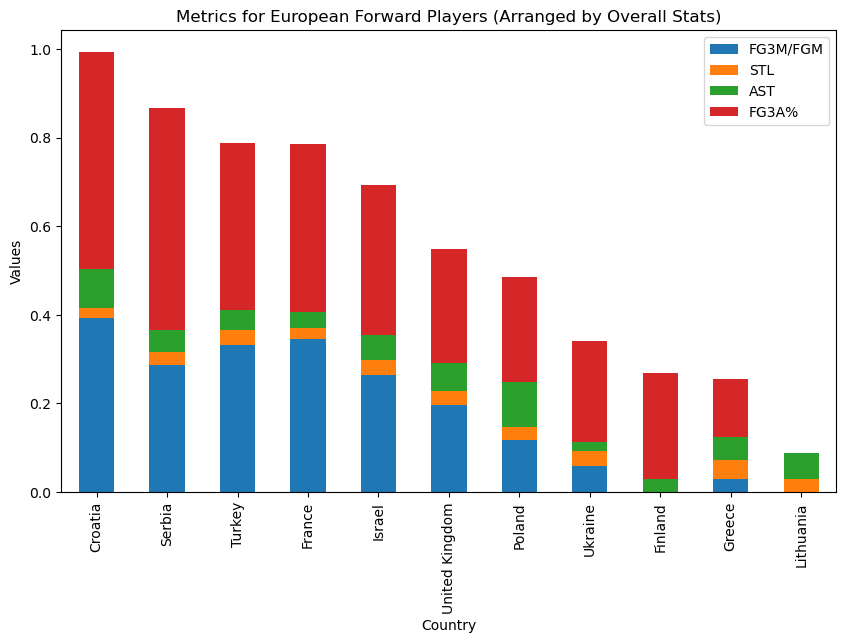

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate mean values for metrics for European forward players
avg_3p_europe = europe_F_regular.groupby('COUNTRY')['FG3M/FGM'].mean().reset_index()
avg_STL_europe = europe_F_regular.groupby('COUNTRY')['STL'].mean().reset_index()
avg_FGA_europe = europe_F_regular.groupby('COUNTRY')['FG3A%'].mean().reset_index()
avg_AST_europe = europe_F_regular.groupby('COUNTRY')['AST'].mean().reset_index()
# avg_Hand_width_europe = europe_F_regular.groupby('COUNTRY')['HAND_WIDTH_FILLED'].mean().reset_index()

# Merge the four DataFrames
merged_df = pd.merge(avg_3p_europe, avg_STL_europe, on='COUNTRY')
merged_df = pd.merge(merged_df, avg_AST_europe, on='COUNTRY')
merged_df = pd.merge(merged_df, avg_FGA_europe, on='COUNTRY')
# merged_df = pd.merge(merged_df, avg_Hand_width_europe, on='COUNTRY')

# Set 'COUNTRY' as index
merged_df.set_index('COUNTRY', inplace=True)

# Calculate overall stats (sum of mean values of all metrics)
merged_df['TOTAL'] = merged_df.sum(axis=1)

# Sort the DataFrame by overall stats (descending order)
sorted_df = merged_df.sort_values(by='TOTAL', ascending=False)

# Plot
sorted_df.drop('TOTAL', axis=1).plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Values')
plt.title('Metrics for European Forward Players (Arranged by Overall Stats)')

# Show plot
plt.show()


/var/folders/7h/233xrn2x20n5883dfdqwt5zr0000gn/T/ipykernel_15406/823519500.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = subset_df.corr()


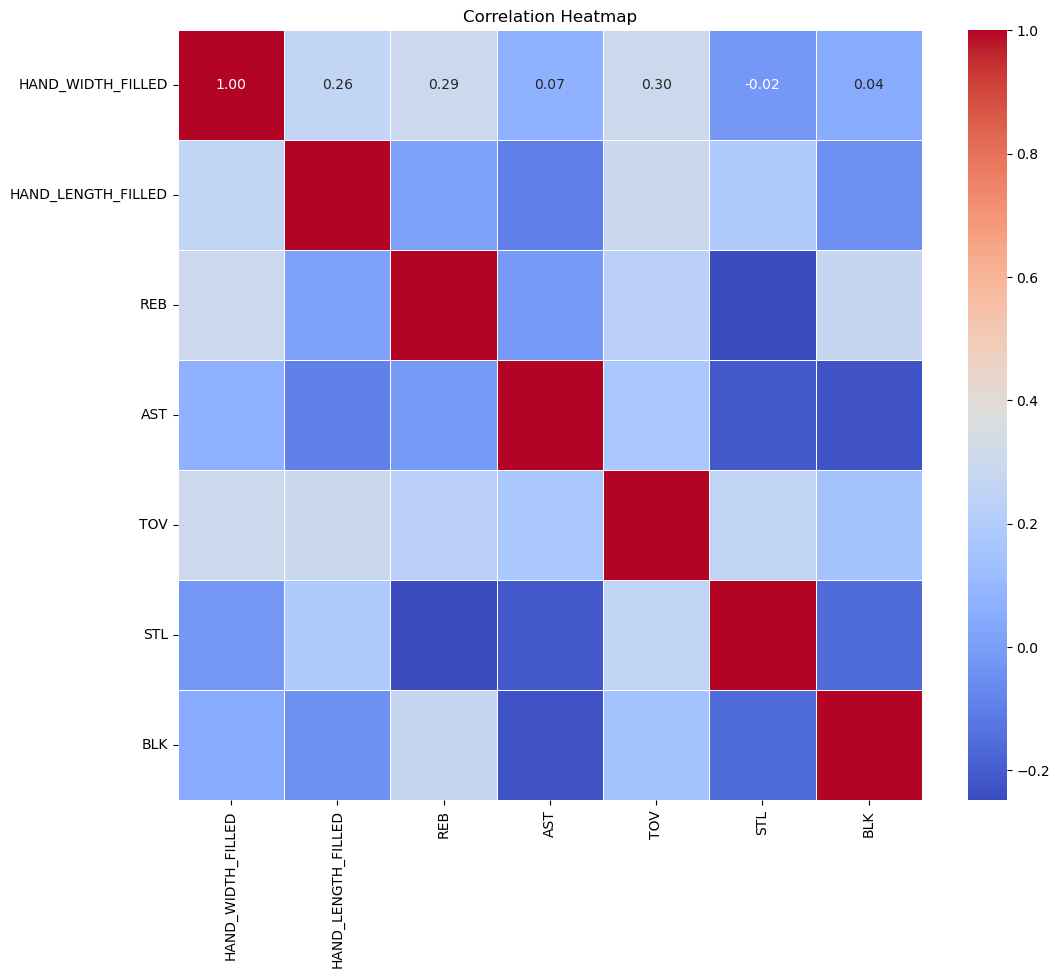

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for correlation analysis
columns_of_interest = ['HAND_WIDTH_FILLED', 'HAND_LENGTH_FILLED', 'REB', 'AST', 'TOV', 'STL', 'BLK' ,'HEIGHT_WO_SHOES_FT_IN']

# Create a subset DataFrame with selected columns
subset_df = europe_F_regular[columns_of_interest]

# Calculate correlation matrix
correlation_matrix = subset_df.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
